In [1]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, Math, Markdown, HTML

In [6]:
# helper functions

dcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def latex(*args, sep='', align=True, as_str=False):
    '''
    display math latex
    '''
    terms = []
    for arg in args:
        if isinstance(arg, (sp.Basic, sp.Matrix)):
            terms.append(sp.latex(arg))
        else:
            terms.append(str(arg))
    
    res = sep.join(terms)
    
    if align:
        res = r'\begin{align}' + res + r'\end{align}'
    
    if as_str:
        return res
    
    display(Math(res))
    
    
def disp(content, parser=Markdown):
    """
    Display content with parser. Default markdown.
    """
    
    display(parser(str(content)))
    

def matrix(rows=3, cols=3, symbol='x'):
    """
    Make quick sympy matrix with indexed symbol elements
    """
    # symbol components
    comps = sp.symbols(r'%s_{1:%s\,1:%s}' % (symbol, rows+1, cols+1))
    
    # components array
    comps_array = np.array(comps).reshape(rows, cols)
    
    # return sympy
    return sp.Matrix(comps_array)


def plot_vec(ax, v, start=[0, 0], **kwargs):
    
    default = dict(alpha=0.5, scale=1, width=0.0125, angles='xy', scale_units='xy')
    default.update(kwargs)
    
    return ax.quiver(*start, *v, **default)

# Vectors

In [16]:
# setup

# vector elements
a = sp.symbols('a_1, a_2, a_3, a_4', real=True)
b = sp.symbols('b_1, b_2, b_3, b_4', real=True)

# scalars
alpha, beta = sp.symbols('alpha, beta', real=True)

# vectors
A = sp.Matrix(a[:2])
B = sp.Matrix(b[:2])


# elements values
subs = {x : 1+i for i, x in enumerate(a)}
subs.update({x : 3-i for i, x in enumerate(b)})
subs.update({alpha : 2, beta : -2})


# substitute values
A_sub = A.subs(subs)
B_sub = B.subs(subs)

alpha_sub = alpha.subs(subs)
beta_sub = beta.subs(subs)


# vector values
A_val = [float(x) for x in A_sub]
B_val = [float(x) for x in B_sub]

In [27]:
# show variables

disp("### Column Vectors")

A_shape = r' \times '.join(str(x) for x in A.shape)
latex(r'A =', A, '=', A_sub, r'\in \mathbb{R}^{%s}' % A_shape)

B_shape = r' \times '.join(str(x) for x in B.shape)
latex(r'B =', B, '=', B_sub, r'\in \mathbb{R}^{%s}' % B_shape)


disp("### Row Vectors")

A_shape = r' \times '.join(str(x) for x in A.T.shape)
latex(r'A^T =', A.T, '=', A_sub.T, r'\in \mathbb{R}^{%s}' % A_shape)

B_shape = r' \times '.join(str(x) for x in A.T.shape)
latex(r'A^T =', B.T, '=', B_sub.T, r'\in \mathbb{R}^{%s}' % A_shape)

latex(r'\alpha =', alpha_sub,
      r', \quad \beta', '=', beta_sub,
      r', \quad \alpha, \beta \in \mathbb{R}'
     )

### Column Vectors

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Row Vectors

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---
## Scaling

$$
\begin{align}
    A &\in \mathbb{R}^{m \times 1}, \quad
    \alpha \in \mathbb{R},
    \quad
    \beta A
    = \beta \begin{bmatrix}
        A_1 \\
        A_2 \\
        \vdots \\
        A_m
    \end{bmatrix}
    =
    \begin{bmatrix}
        \beta A_1 \\
        \beta A_2 \\
        \vdots \\
        \beta A_m
    \end{bmatrix} 
    \\
    \\
    A &\in \mathbb{R}^{1 \times n}, \quad
    \beta \in \mathbb{R},
    \quad
    \beta A
    = \begin{bmatrix}
        \beta A_1 &
        \beta A_2 &
        \dots &
        \beta A_n
    \end{bmatrix}
\end{align}
$$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

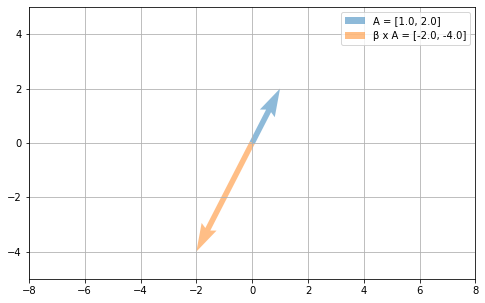

In [21]:
# scaling vector

C = beta * A
C_sub = C.subs(subs)
C_val = [float(x) for x in C_sub]


# symbolic
latex(r'\beta \times A =',
      beta, A, '=',
      C
     )

# values
latex(r'\beta \times A =',
      beta_sub, A_sub, '=',
      C_sub
     )


# geometric representation
fig, ax = plt.subplots(figsize=(8, 5))

# vector A
plot_vec(ax, A_val, color=dcolors[0], label='A = ' + str(A_val))

# vector beta * A
plot_vec(ax, C_val, color=dcolors[1], label=r'β x A = ' + str(C_val))

ax.set_xlim(-8, 8)
ax.set_ylim(-5, 5)

ax.grid()
ax.legend()

plt.show()

---
## Vector Addition

$$
\begin{align}
    A, B &\in \mathbb{R}^{m \times 1},
    \quad
    A + B
    = \begin{bmatrix}
        A_1 \\
        A_2 \\
        \vdots \\
        A_n
    \end{bmatrix}
    +
    \begin{bmatrix}
        B_1 \\
        B_2 \\
        \vdots \\
        B_n
    \end{bmatrix} 
    =
    \begin{bmatrix}
        A_1 + B_1 \\
        A_2 + B_2 \\
        \vdots \\
        A_n + B_n
    \end{bmatrix} 
    \\
    \\
    A, B &\in \mathbb{R}^{1 \times n},
    \quad
    A + B
    = \begin{bmatrix}
        A_1 + B_1 &
        A_2 + B_2 &
        \dots &
        A_n + B_n
    \end{bmatrix}
\end{align}
$$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

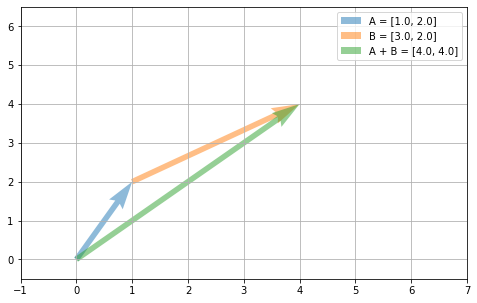

In [22]:
# addition
C = A + B
C_sub = C.subs(subs)
C_val = [float(x) for x in C_sub]

# symbolic operation
latex('A + B &=',
      A, '+', B, '=',
      C
     )

# operation with values
latex('A + B &=',
      A_sub, '+', B_sub, '=',
      C_sub
     )


# geometric representation
fig, ax = plt.subplots(figsize=(8, 5))

# vector A
plot_vec(ax, A_val, color=dcolors[0], label='A = ' + str(A_val))

# vector B
plot_vec(ax, B_val, A_val, color=dcolors[1], label='B = ' + str(B_val))

# vector A + B
plot_vec(ax, C_val, color=dcolors[2], label='A + B = ' + str(C_val))

ax.set_xlim(-1, 7)
ax.set_ylim(-.5, 6.5)

ax.grid()

plt.legend()
plt.show()

## 3-D Vectors

<IPython.core.display.Javascript object>


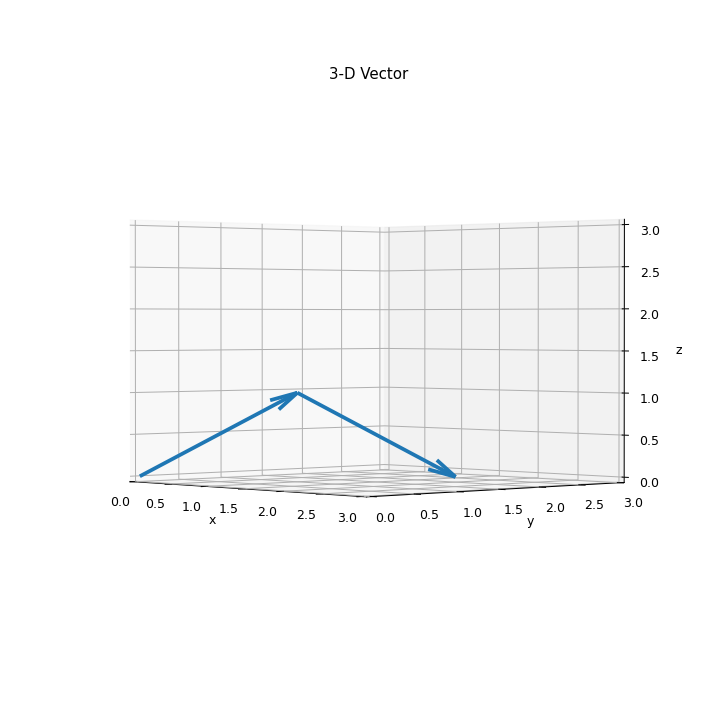

In [29]:
%matplotlib notebook

disp('## 3-D Vectors')

# 3-D plot
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

fmt = dict(arrow_length_ratio=0.15, lw=3)

ax.quiver(0, 0, 0,
          1, 1, 1,
          **fmt
         )

ax.quiver(1, 1, 1,
          1, 1, -1,
          **fmt
         )

ax.set_title('3-D Vector')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

---
## Transpose

$$
\begin{align}
    A &\in \mathbb{R}^{m \times 1},
    \quad
    A^T
    = \begin{bmatrix}
        A_1 \\
        A_2 \\
        \vdots \\
        A_m
    \end{bmatrix}^{\; T}
    = \begin{bmatrix}
        A_1 &
        A_2 &
        \dots &
        A_m
    \end{bmatrix}
    \\\\
    B &= A^T \iff B^T = A
\end{align}
$$

In [23]:
# transpose
At_sub = A.T.subs(subs)
At_val = [float(x) for x in At_sub]

# symbolic
latex('A^T = ', A, '^T =',
      A.T)

# values
latex('A^T = ', A_sub, '^T =',
      At_sub)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---
## Vector Multiplication (Dot product)

$$
\begin{align}
    A &\in \mathbb{R}^{1 \times m}, \quad
    B \in \mathbb{R}^{m \times 1}, \quad
    \\
    A \cdot B
    &= \begin{bmatrix}
        B_1 &
        B_2 &
        \dots &
        A_m
    \end{bmatrix}
    \begin{bmatrix}
        A_1 \\
        A_2 \\
        \vdots \\
        A_m
    \end{bmatrix}
    \\
    &= \sum_{i=1}^{m} A_{1, i}  B_{i, 1}
    = A_{1, 1}  B_{1, 1}
    + A_{1, 2}  B_{2, 1}
    + \dots
    + A_{1, m}  B_{m, 1}
    \\
    &= \sum_{i=1}^{m} A_{i}  B_{i}
    = A_{1}  B_{1}
    + A_{2}  B_{2}
    + \dots
    + A_{m}  B_{m}
\end{align}
$$

In [24]:
# dot/inner product

C = A.T @ B
C_sub = C.subs(subs)
C_val = [float(x) for x in C_sub]

# symbolic
latex(r'A^T B =',
      A.T, B, '=',
      C[0]
     )

# values
latex(r'A^T B =',
      At_sub, B_sub, '=',
      C_sub[0]
     )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## L-2 Norm

$$
\begin{align}
    A \in \mathbb{R}^{m \times 1}, \quad
    ||A||_2 = \sqrt{A^T A} = \sqrt{\sum_{i=1}^m A_i^2}
\end{align}
$$

In [ ]:
# 2-norm (Euclidean length)

# symbolic
latex(r'\sqrt{A^T A} =',
      A.T, B, '=',
      C[0]
     )